## Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)
passengers = pd.read_csv('titanic.csv')
pd.DataFrame(passengers)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [2]:
passengers.replace('?', np.nan, inplace=True)
passengers = passengers.astype({"age": np.float64, "fare": np.float64})


<AxesSubplot:xlabel='survived', ylabel='fare'>

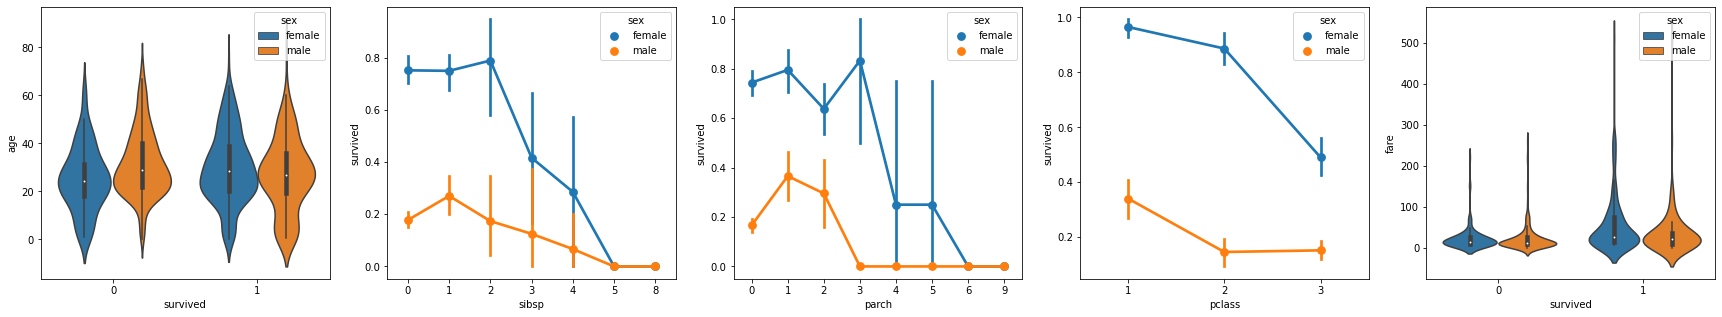

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30, 5))
sns.violinplot(x="survived", y="age", hue="sex", data=passengers, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=passengers, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=passengers, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=passengers, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=passengers, ax=axs[4])
# sns.pointplot(x="fare", y="survived", hue="sex", data=data, ax=axs[5])


In [4]:
passengers.replace({'male': 1, 'female': 0}, inplace=True)
passengers.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [5]:
passengers['relatives'] = passengers.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
passengers.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [6]:
passengers = passengers[['sex', 'pclass','age','relatives','fare','survived']].dropna()

## Model

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(passengers[['sex','pclass','age','relatives','fare']], passengers.survived, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [10]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


## Neural network

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

ModuleNotFoundError: No module named 'tensorflow'